In [2]:
import torch.nn as nn
nn.Conv2d??

## 1.1-卷积   
卷积在 pytorch 中有两种方式，一种是 `torch.nn.Conv2d()`，一种是 `torch.nn.functional.conv2d()`，这两种形式本质都是使用一个卷积操作   
```
nn.Conv2d(
    in_channels,   
    out_channels,   
    kernel_size,   
    stride=1,   步长     
    padding=0,   每一维补0数量   
    dilation=1,   控制 kernel 点之间的空间距离   
    groups=1,   控制 inputs 和 outputs间的关联性(分组).要求 in_channels 和 out_channels必须都可以被 groups 整除    
    bias=True,     
)
```   

输入格式： `(batch, channel, H, W)`

In [1]:
import numpy as np
import torch as t
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
im = Image.open('./img/lena.png').convert('L')
im = np.array(im, dtype='float32')

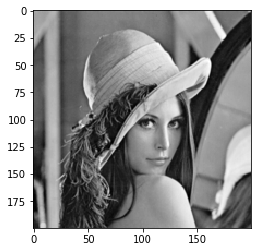

In [3]:
plt.imshow(im.astype('uint8'), cmap='gray')

In [4]:
im.shape[0], im.shape[1]

(200, 200)

In [5]:
# 转化为tensor
im = t.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1])))


conv1 = nn.Conv2d(1, 1, 3, bias=False)

# 定义轮廓检测算子
sobel_kernel = np.array([[-1, -1, -1], 
                         [-1, 8, -1], 
                         [-1, -1, -1]], dtype='float32') 
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3))
conv1.weight.data = t.from_numpy(sobel_kernel)

edge1 = conv1(im) 
edge1 = edge1.data.squeeze().numpy()

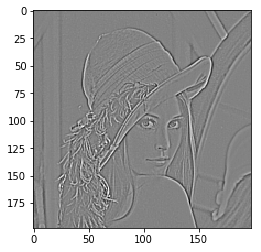

In [6]:
plt.imshow(edge1, cmap='gray')